In [1]:
%matplotlib inline
import numpy as np
np.set_printoptions(precision=4, suppress=True)

import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Lecture 5: Statistics and Probability

Today we will review of some statistics and probability needed for doing data analysis.


First, let's do a quick survey on number of FB friends of people in this class.

In [2]:
# data = [
#         (1, 100),
#         (2, 200),
#         (3, 300),
#         (4, 400),
#         (5, 500),
#         (6, 600),
#         (7, 400),
#         (8, 200),
# ]

data = [
        (1995, 224),
        (1995, 400),
        (1996, 529),
        (1994, 702),
        (1995, 337),
        (1996, 870),
        (1996, 183),
        (1996, 178),
        (1996, 650),
        (1996, 777),
        (1992, 797),
        (1995, 381),
        (1998, 1188),
        (1996, 298),
        (1994, 683),
        (1995, 222),
        (1991, 300)
]

stuId, num_friends = zip(*data)

To look at how the data is distributed, we can look at the histogram plot. The histogram plot is very useful for describing a single dimenstion of the data.

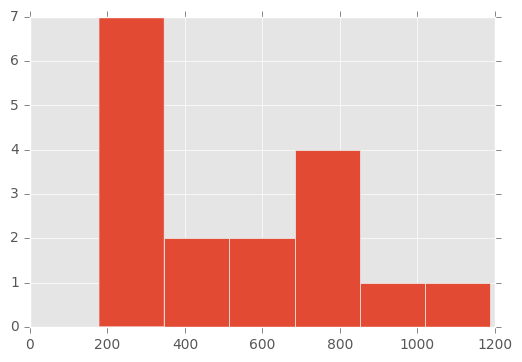

In [3]:
(n, bins, patches) = plt.hist(num_friends, bins=6)

Sometimes, you just want only a quick summary about the data. So you start generating some statistics:

In [4]:
# Number of data points
print "num of data point: ",len(num_friends)

# Maximum value
print "max = ",max(num_friends)

# Minimum value
print "min = ",min(num_friends)

# 2nd smallest
sorted_num_friends = sorted(num_friends)
print "2nd smallest = ",sorted_num_friends[1]

num of data point:  17
max =  1188
min =  178
2nd smallest =  183


Many times, we'd like to know where our data is centered.

In [5]:
# Mean
print "mean:",np.mean(num_friends)

# Median
print "median:",np.median(num_friends)

mean: 512.882352941
median: 400.0


Although the mean is easy to calculate i.e. $\frac{1}{n} \sum_1^n x_i$, it is sensitive to **outliers**.

In [6]:
num_friends_with_outlier = num_friends + (1000000,)

# Mean
print "mean:",np.mean(num_friends_with_outlier)

# Median
print "median:",np.median(num_friends_with_outlier)

mean: 56039.9444444
median: 464.5


### Dispersion

The term *Dispersion* refers to measures of how spread out our data is. A very simple statistics is `range` which is simply the difference between the minimum and the maximum values. Consider the following.

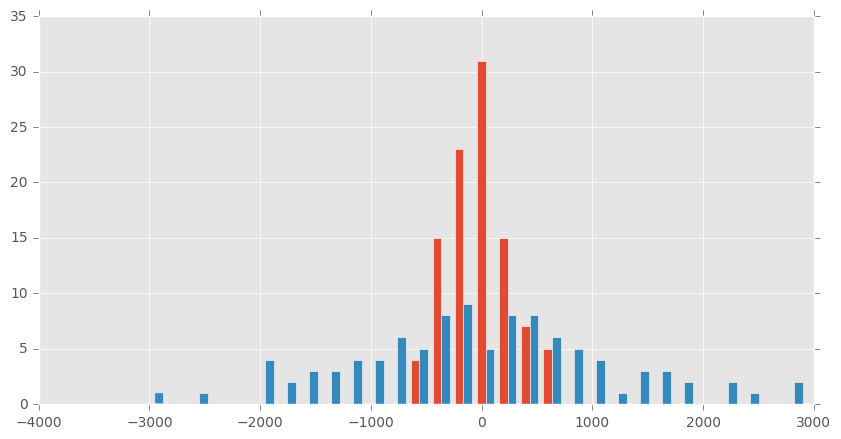

In [7]:
data1 = np.random.randn(1,100)*300
data2 = np.random.randn(1,100)*1000

plt.figure(figsize=(10,5))
(n,bins,_) = plt.hist([data1,data2],bins=30)

In [8]:
# Measure dispersion of the two datasets using range, variance, standard deviation, interquartile range
range_data1 = np.max(data1) - np.min(data1)
print "range of data1 =", range_data1

range_data2 = np.max(data2) - np.min(data2)
print "range of data2 =", range_data2

var_data1 = np.var(data1)
print "variance of data1 =", var_data1

var_data2 = np.var(data2)
print "variance of data2 =", var_data2

# IQR: interquatile range

range of data1 = 1214.06901578
range of data2 = 5974.89222893
variance of data1 = 77794.943608
variance of data2 = 1311233.48305


## Correlation

Suppose you want to investigate relationship between two variables. Lets verify if student ids are related to number of friends

In [9]:
np.cov(stuId, num_friends)

array([[     2.6838,     97.5074],
       [    97.5074,  84947.6103]])

Covariance is difficult to interpret. It's more common to look at the Pearson correleation coefficient.

>The Pearson correlation coefficient measures the linear relationship between two datasets. Strictly speaking, Pearson’s correlation requires that each dataset be normally distributed. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact linear relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.

In [10]:
(r,_) = stats.pearsonr(stuId, num_friends)
print r

0.204213667826


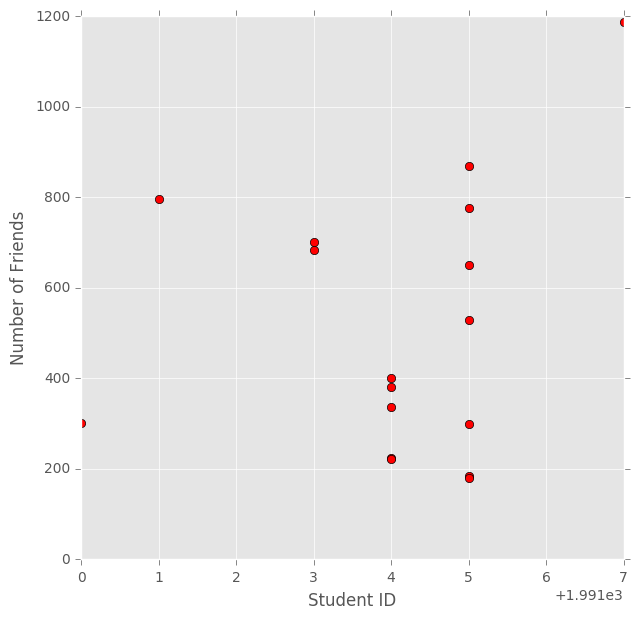

In [11]:
plt.figure(figsize=(7,7))
plt.plot(stuId, num_friends, 'or')
plt.xlabel('Student ID')
plt.ylabel('Number of Friends')

## Simpson's Paradox

One not uncommon surprise when analyzing data is Simpson’s Paradox, in which correlations can be misleading when **confounding** variables are ignored.

In [12]:
west_phd = np.random.randn(35,1)+3.1
east_phd = np.random.randn(70,1)+3.3
west_nonphd = np.random.randn(66,1)+10.9
east_nonphd = np.random.randn(33,1)+13.4


In [13]:
west = np.concatenate([west_phd, west_nonphd],axis=0)
east = np.concatenate([east_phd, east_nonphd],axis=0)

In [14]:
print "west",west.mean()
print "east",east.mean()

west 8.08663228176
east 6.41067776301


In [15]:
print "west phd",west_phd.mean()
print "east phd",east_phd.mean()
print "west nonphd",west_nonphd.mean()
print "east nonphd",east_nonphd.mean()

west phd 2.92951353655
east phd 3.22023279228
west nonphd 10.82146798
east nonphd 13.178288307


## Correlation and Causation

You have probably heard at some point that “correlation is not causation,” most likely by someone looking at data that posed a challenge to parts of his worldview that he was reluctant to question. Nonetheless, this is an important point—if x and y are strongly correlated, that might mean that x causes y, that y causes x, that each causes the other, that some third factor causes both, or it might mean nothing.

# Probability

Let's talk about this on the board... Feel free to take notes here.

Topics:
- Dependence and Independence
- Conditional Probability
- Bayes's Theorem
- Random Variables
- Continuous Distributions (Uniform and Normal)
- The Central Limit Theorem (CLT)

## Notes

### Dependence vs Independent

**Probability** - a way of quantifying uncertainty with **events** chosen from some **universe** of events

$P(E)$ means "the probability of the event $E$"

Two events A dn B are **dependent** if knowing something about A gives information about B. Otherwise,
they are **independent**

$$ P(A, B) = P(A)P(B) $$
<center>means A and B are **independent**</center>

#### Conditional Probability
$ P(A, B) = P(A)P(B) $

$ P(A, B) = P(A \mid B)P(B) $


### Examples

**Question**: In family with 2 children, is the gender of the second child depends on the gender of the first child?

$ P(second=Boy \mid first=Boy) = P(second=Boy) ? $

**steps**:
- Since we don't know the probability, we have to **approximate** it instead
- Collect data and use it to **approximate** the probability.

| first child   | second child  | count |
| ------------- |:-------------:| -----:|
| Boy           | Boy           |     30|
| Boy           | Girl          |     20|
| Girl          | Boy           |     20|
| Girl          | Girl          |     30|


$\hat{P}(first=Boy) = \frac{50}{100} = 0.5 $

$\hat{P}(second=Girl) = \frac{50}{100} = 0.5 $

$\hat{P}(second=Boy \mid first=Boy) = \frac{30}{50} = 0.6 $

$\hat{P}(second=Boy) = \frac{50}{100} = 0.5 $

$\hat{P}(first=Girl \mid second=Boy) = \frac{20}{50} = 0.4 $

**Question**: Can I predict the gender of the second child?

$ P(second=Boy \mid first=Boy) = ? $

Ignore the table above

**Assumption**

$ P(first=Boy \mid second=Boy) = 0.6 $

$ P(first=Boy) = 0.5 $

$ P(second=Boy) = 0.5 $

**Answer**: $ P(second=Boy \mid first=Boy) = \frac{0.6 \times 0.5}{0.5} = 0.6 $

### Bayes's Theorem

I know $ P(A \mid B) $, can I find out $ P(B \mid A) $?

$$ P(B \mid A) = \frac{P(A \mid B) P(B)}{P(A)} $$

## Spam Email Detection

$ P(\text{email is spam} \mid \text{has 'Casino'}) = 
\frac{P(\text{has 'Casino'} \mid \text{email is spam}) \times P(\text{email is spam})}
{P(\text{has 'Casino')}}
$

### Random Variable

Let

$ 
    X = \left\{\begin{array}{lr}
        1, & \text{if email is spam } - 10\% \\
        0, & \text{ if email is not spam } - 90\%\\
        \end{array}\right\}
$

### Distribution

pdf = probability distribution function

$$ \text{PDF Normal}(\sigma, \mu) = \frac{1}{\sigma\sqrt{2\pi}}  \mathrm{e}^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$


## Sampling

**IID** = Independent and identically distributed random variables

## Demo: The Central Limit Theorem
One reason the normal distribution is so useful is the central limit theorem, which says (in essence) that a random variable defined as the average of a large number of independent and identically distributed random variables is itself approximately nor‐ mally distributed.


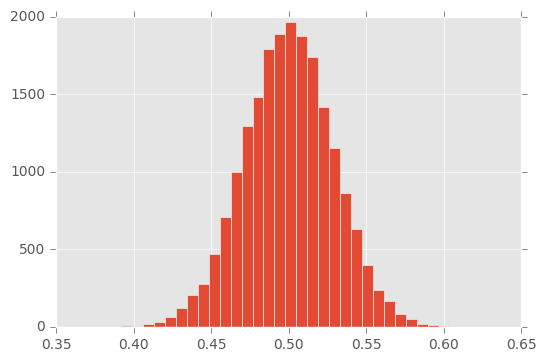

In [16]:
ys = []
for i in range(20000):
    x = np.random.rand(100,1)
    ys.append(x.mean())
_ = plt.hist(ys,bins=30)